Import of libraries

In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In total, the dataset contains 159 objects. We have reserved a part of the dataset for the baseline task. In this assignment, it is assumed to work with a dataset containing 119 objects.

# 0. Application of polynomial regression to predict a continuous parameter

The provided dataset consists of seven different types of fish sold in some fish shop. The goal is to predict the mass of the fish from some indirect features known about the fish. The features themselves may need to be synthesized from those that are known.

Use <code>train_test_split()</code> to split the dataset into training and test samples with the parameters specified in your assignment. Use stratification by column <code>Species</code>. Stratification will maintain the proportions of represented objects (by fish type representatives) in the training and test samples.

In [125]:
df = pd.read_csv('fish_train.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


In [126]:
X = df.drop(columns="Weight")
y = df["Weight"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df["Species"], random_state=7)

Find sample mean for the column <code>Width</code> of the obtained training sample.

In [127]:
width_mean_training = X_train["Width"].mean()
width_mean_training

np.float64(4.512485263157894)

# 1. Building a base model

Remove categorical features and train a linear regression model (<code>LinearRegression()</code>) on the training dataset. Perform predictions on the test dataset. 
Evaluate the model using the metric <code>r2_score()</code>.

In [128]:
numerical_X_train, numerical_X_test = X_train.select_dtypes(include=np.number), X_test.select_dtypes(include=np.number)
numerical_X_train

,Length1,Length2,Length3,Height,Width
51,10.0,10.5,11.6,1.9720,1.1600
34,32.5,35.0,37.3,11.4884,7.7957
44,13.5,14.7,16.5,6.8475,2.3265
96,32.0,35.0,40.6,16.3618,6.0900
35,48.3,51.7,55.1,8.9262,6.1712
...,...,...,...,...,...
114,23.0,25.0,28.0,11.0880,4.1440
14,21.0,23.0,24.5,5.2185,3.6260
79,25.4,27.5,28.9,7.0516,4.3350
17,27.8,30.0,31.6,7.6156,4.7716


In [129]:
model = LinearRegression()
model.fit(numerical_X_train, y_train)
y_pred = model.predict(numerical_X_test)
r2 = r2_score(y_test, y_pred)
r2

0.8759245925717026

# 2. Adding feature preprocessing

## Use of PCA

Using, for example, <code>sns.heatmap()</code>, construct a feature correlation matrix of the training dataset and identify the top three most correlated features.

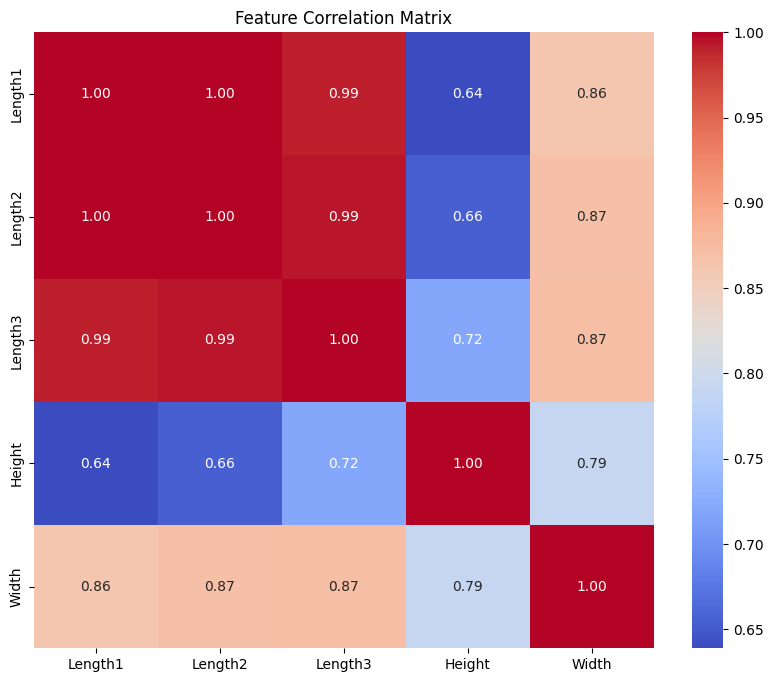

In [130]:
import matplotlib.pyplot as plt

corr_num_train = numerical_X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_num_train, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show() 

Linear models respond rather poorly to correlated features, so it makes sense to get rid of such features before training begins.

Use the principal component analysis to reduce the number of uninformative dimensions.

1) Apply the principal component analysis (<code>PCA(n_components=3, svd_solver='full')</code>) to the three most correlated features found. 

2) Calculate the explained variance ratio when using only the first principal component.

3) Replace the top three most correlated features with the new feature <code>Lengths</code> whose values coincide with the scores for the first principal component.

In [131]:
length_features_train = X_train[["Length1","Length2","Length3"]]
length_features_train

,Length1,Length2,Length3
51,10.0,10.5,11.6
34,32.5,35.0,37.3
44,13.5,14.7,16.5
96,32.0,35.0,40.6
35,48.3,51.7,55.1
...,...,...,...
114,23.0,25.0,28.0
14,21.0,23.0,24.5
79,25.4,27.5,28.9
17,27.8,30.0,31.6


In [132]:
pca = PCA(n_components=3, svd_solver='full')
Length_train_3comp = pca.fit_transform(length_features_train)
Length_train_3comp

array([[-3.16520470e+01, -4.44249205e-01, -2.42884807e-01],
       [ 1.03806822e+01, -8.56073903e-01,  2.18348124e-02],
       [-2.43309818e+01,  5.45443033e-02, -1.22143637e-02],
       [ 1.21585545e+01,  1.96859054e+00,  8.37902167e-04],
       [ 3.94539296e+01, -1.15765422e+00, -1.37330328e-01],
       [ 1.99021961e+01,  1.84217450e+00,  6.69228959e-03],
       [ 5.36918484e+00,  1.68358333e+00, -2.69773098e-01],
       [ 1.87044995e+01, -1.03107090e+00,  2.30262771e-01],
       [ 1.65557565e+01, -1.04079285e+00, -1.34167011e-01],
       [ 1.56913094e+01, -9.92192387e-01, -1.14952934e-01],
       [-1.05186857e+01, -5.57586327e-02, -2.53692549e-01],
       [ 5.94349690e+00, -5.41816278e-01, -2.94353653e-02],
       [ 5.20885790e+00,  1.83908718e+00, -6.94887332e-02],
       [ 4.67534377e+01, -1.03138407e+00,  6.57424128e-02],
       [ 1.32519997e+01, -1.88806520e-01,  4.79352885e-03],
       [-1.41538610e+01,  3.49935295e-02, -8.85715023e-02],
       [-9.68209115e+00,  3.36205846e-01

In [133]:
Length_train = Length_train_3comp[:, 0]
Length_train

array([-31.65204699,  10.38068221, -24.33098175,  12.15855451,
        39.45392964,  19.90219608,   5.36918484,  18.70449948,
        16.55575649,  15.69130938, -10.51868572,   5.9434969 ,
         5.2088579 ,  46.75343766,  13.25199965, -14.15386097,
        -9.68209115,  15.3491314 ,   1.68056728,  -9.73016776,
         1.26382146, -25.18240157,   2.67702398, -11.36607299,
       -24.30809139,  -4.87803458,  -5.83361146, -12.34593465,
         3.89891097, -11.56051963, -14.05240333,  24.77268913,
         8.72861859, -30.90301442,   9.68825619, -30.14498713,
         6.93775213,  29.48608074, -28.47403258, -35.93029979,
       -30.37984879,  24.12201127,  -4.2762735 ,  -2.94253475,
        17.35823137, -15.98427413,  13.09796803,  18.93532858,
        -2.06555828, -13.79102228, -19.31811811,  21.77746034,
       -12.3235091 ,  -4.35440413,  -2.94299956,  -6.21490443,
         5.99427292, -14.05240333,  10.39554058,  -3.27578424,
        -3.95161523, -11.11328314,  -8.46690301,  12.04

In [134]:
explained_variance_ratio = pca.explained_variance_ratio_[0]
explained_variance_ratio

np.float64(0.9963067360120653)

In [135]:
numerical_X_train.columns

Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [136]:
dropped_features = ["Length1", "Length2", "Length3"]
X_train_mod = numerical_X_train.drop(columns=dropped_features)
X_train_mod["Lengths"] = Length_train
X_train_mod


,Height,Width,Lengths
51,1.9720,1.1600,-31.652047
34,11.4884,7.7957,10.380682
44,6.8475,2.3265,-24.330982
96,16.3618,6.0900,12.158555
35,8.9262,6.1712,39.453930
...,...,...,...
114,11.0880,4.1440,-6.207243
14,5.2185,3.6260,-10.594615
79,7.0516,4.3350,-2.930005
17,7.6156,4.7716,1.462732


In [137]:
length_features_test = X_test[["Length1","Length2","Length3"]]
length_features_test

,Length1,Length2,Length3
11,35.0,38.5,44.1
55,44.8,48.0,51.2
25,18.4,20.0,22.4
6,15.7,17.4,18.5
59,13.2,14.3,15.2
84,11.4,12.0,13.2
112,34.6,37.0,39.3
39,26.9,28.7,30.1
115,42.0,45.0,48.0
9,23.2,25.4,30.0


Apply the obtained transformation for the same features in the test dataset. Note that it is not necessary to re-train the `PCA` transformation. Similarly to the previous step, replace the three considered features by one.

In [138]:
Length_test_3comp = pca.transform(length_features_test)
Length_test_3comp

array([[ 1.79424727e+01,  1.88756034e+00,  2.00146637e-01],
       [ 3.30399611e+01, -1.05716431e+00, -1.07165784e-01],
       [-1.50097782e+01,  2.13170775e-01, -1.33476125e-02],
       [-2.03639846e+01, -4.92920291e-01,  2.93098388e-01],
       [-2.55268473e+01, -6.58089401e-01,  3.31602206e-02],
       [-2.90501757e+01, -4.60473833e-01, -2.44517225e-01],
       [ 1.38919130e+01, -1.10231039e+00, -1.21782950e-01],
       [-6.95005380e-01, -1.30622977e+00, -1.06633223e-01],
       [ 2.78362186e+01, -1.02471505e+00, -1.03900947e-01],
       [-4.63101396e+00,  1.70962099e+00, -5.68270382e-02],
       [-1.83611468e+01,  2.06740587e-01,  1.54839445e-01],
       [ 5.08987560e+00,  1.89413549e+00, -3.57261032e-01],
       [-7.76641187e+00, -6.48552376e-01,  1.62941834e-01],
       [ 7.05316668e+00,  1.76779379e+00, -1.85429984e-01],
       [ 1.73497014e+01, -1.29671226e+00, -1.98639258e-01],
       [-2.37762095e+00,  6.73008631e-01, -1.44318575e-01],
       [ 1.96619356e+01, -3.05503403e-01

In [139]:
Length_test = Length_test_3comp[:, 0]
Length_test

array([ 17.94247275,  33.03996114, -15.00977816, -20.36398457,
       -25.52684727, -29.05017572,  13.89191298,  -0.69500538,
        27.8362186 ,  -4.63101396, -18.3611468 ,   5.0898756 ,
        -7.76641187,   7.05316668,  17.34970144,  -2.37762095,
        19.66193559, -10.65342289, -22.88589413, -14.05240333,
        24.30792798,   3.52487606,  18.88188627,  -2.9300054 ])

In [140]:
X_test_mod = numerical_X_test.drop(columns=dropped_features)
X_test_mod["Lengths"] = Length_test
X_test_mod

,Height,Width,Lengths
11,18.0369,6.3063,17.942473
55,7.6800,5.3760,33.039961
25,8.8928,3.2928,-15.009778
6,4.5880,2.9415,-20.363985
59,2.8728,2.0672,-25.526847
84,2.2044,1.1484,-29.050176
112,10.5717,6.3666,13.891913
39,7.5852,4.6354,-0.695005
115,6.9600,4.8960,27.836219
9,11.5200,4.0200,-4.631014


Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions on the test dataset and evaluate the model using <code>r2_score()</code>.

In [141]:
model.fit(X_train_mod, y_train)
y_pred = model.predict(X_test_mod)
r2 = r2_score(y_test, y_pred)
r2

0.8638980776530604

It can be seen that the quality of the model has not changed significantly.

## Feature engineering

Plot the dependencies of the features on the target feature, e.g., by using <code>sns.pairplot()</code>.

<function matplotlib.pyplot.show(close=None, block=None)>

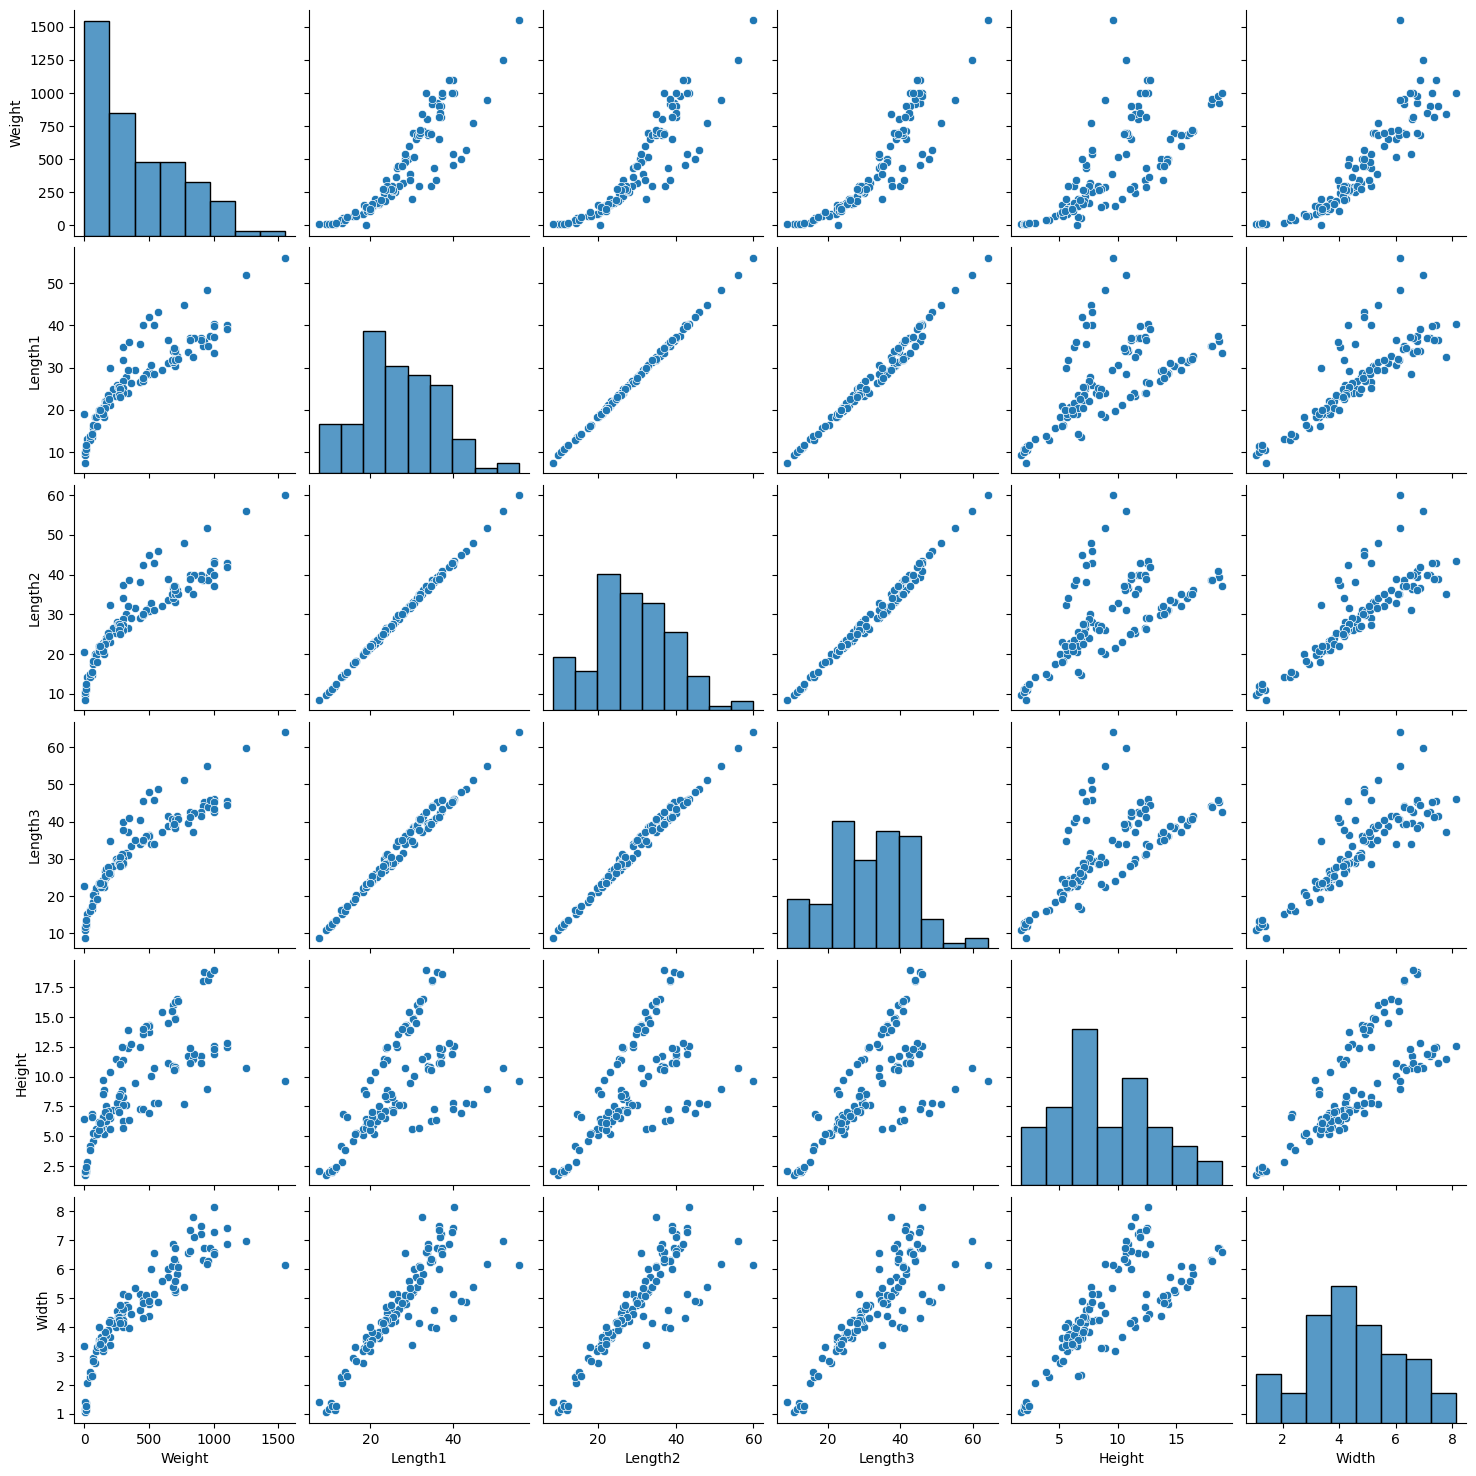

In [65]:
sns.pairplot(df)
plt.show

It can be seen that the mass, in general, does not depend linearly on the other features. So, in order for the linear model to do a proper predictions, it makes sense to transform the features so that the dependence becomes more similar to a linear one. But how to come up with such a dependence?

It is logical to assume that the mass of a fish should somehow smoothly depend on the other parameters responsible in one way or another for its size. If we remember that mass is the product of density by volume, then

$$
m = \rho \cdot V.
$$

Suppose that the average density of all fish is the same, and recall that in homothety the volume of the object depends on the linear dimensions as a cube, then we obtain

$$
m\sim V\sim d^3
$$

Take to the third degree all the features of training and test datasets that are responsible in one way or another for the fish size (<code>Height, Width, Lengths</code>), and check whether the dependence of mass on these features has become linear.

In [142]:
X_train_3degree = X_train_mod.copy()
X_train_3degree["Height"], X_train_3degree["Width"], X_train_3degree["Lengths"] = X_train_3degree["Height"] ** 3, X_train_3degree["Width"] ** 3, X_train_3degree["Lengths"] ** 3
X_train_3degree

,Height,Width,Lengths
51,7.668682,1.560896,-31710.669060
34,1516.277341,473.767597,1118.607400
44,321.067335,12.592419,-14403.860246
96,4380.192923,225.866529,1797.404558
35,711.213252,235.022188,61414.482564
...,...,...,...
114,1363.200233,71.163818,-239.164220
14,142.114065,47.674198,-1189.201704
79,350.641251,81.464295,-25.153896
17,441.684720,108.640584,3.129641


In [143]:
X_test_3degree = X_test_mod.copy()
X_test_3degree["Height"], X_test_3degree["Width"], X_test_3degree["Lengths"] = X_test_3degree["Height"] ** 3, X_test_3degree["Width"] ** 3, X_test_3degree["Lengths"] ** 3
X_test_3degree

,Height,Width,Lengths
11,5867.940377,250.797891,5776.262025
55,452.984832,155.373797,36067.711201
25,703.259448,35.702289,-3381.604562
6,96.576225,25.451100,-8444.778791
59,23.709160,8.833799,-16633.802479
84,10.712016,1.514536,-24515.812494
112,1181.502082,258.061189,2680.934250
39,436.416447,99.600530,-0.335710
115,337.153536,117.361115,21569.035007
9,1528.823808,64.964808,-99.318070


Enter the sample mean for the column <code>Width</code> of the training dataset after cubeization.

In [144]:
width_mean_training_cube = X_train_3degree["Width"].mean()
width_mean_training_cube

np.float64(130.33881727241788)

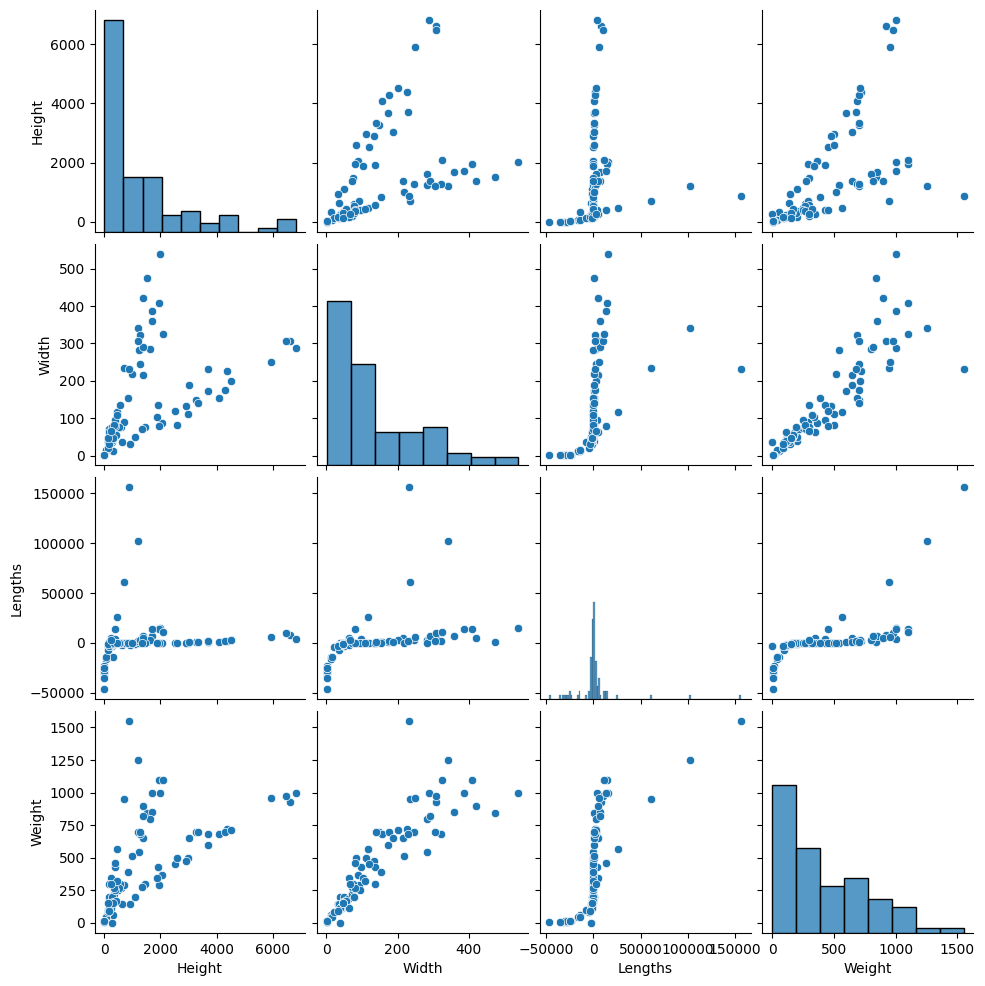

In [145]:
df_3degree_train = X_train_3degree.copy()
df_3degree_train["Weight"] = y_train.to_list()
sns.pairplot(df_3degree_train)

Choose the images corresponding to the dependence of <code>Weight</code> on <code>Width</code> before the transformation and after.

Train a basic linear regression model on the obtained training dataset, again discarding categorical features. Perform predictions for the test dataset, evaluate the model using `r2_score()`.

In [146]:
model.fit(X_train_3degree, y_train)
y_pred = model.predict(X_test_3degree)
r2 = r2_score(y_test, y_pred)
r2

0.9207852790022394

Note how such uncomplicated feature work helped dramatically improve the quality of the model!

## Adding categorical features

Add the previously excluded categorical features to the dataset obtained in the previous step, having previously performed one-hot encoding using pd.get_dummies(). Train the linear regression model. Enter r2_score() of the obtained model.

Perform the <code>one-hot</code> encoding of the categorial feature `Species`, e.g., using <code>pd.get_dummies()</code>.

Train a linear regression model on the obtained training dataset. Perform predictions for the test dataset, evaluate the model using the <code>r2_score()</code>.

<b>Note</b>: We purposely used stratified splitting so that all values of a categorical feature <code>Species</code> are present in all datasets. But this is not always possible. You can read about how to deal with this problem, for example, [here](https://predictivehacks.com/?all-tips=how-to-deal-with-get_dummies-in-train-and-test-dataset).

In [147]:
species_train = pd.get_dummies(X_train["Species"])
one_hot_species = species_train.columns
X_train_final = X_train_3degree.copy()
X_train_final[one_hot_species] = species_train

In [148]:
species_test = pd.get_dummies(X_test["Species"])
X_test_final = X_test_3degree.copy()
X_test_final[one_hot_species] = species_test
X_test_final

,Height,Width,Lengths,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
11,5867.940377,250.797891,5776.262025,True,False,False,False,False,False,False
55,452.984832,155.373797,36067.711201,False,False,False,True,False,False,False
25,703.259448,35.702289,-3381.604562,False,True,False,False,False,False,False
6,96.576225,25.451100,-8444.778791,False,False,True,False,False,False,False
59,23.709160,8.833799,-16633.802479,False,False,False,False,False,True,False
84,10.712016,1.514536,-24515.812494,False,False,False,False,False,True,False
112,1181.502082,258.061189,2680.934250,False,False,True,False,False,False,False
39,436.416447,99.600530,-0.335710,False,False,True,False,False,False,False
115,337.153536,117.361115,21569.035007,False,False,False,True,False,False,False
9,1528.823808,64.964808,-99.318070,True,False,False,False,False,False,False


In [149]:
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
r2 = r2_score(y_test, y_pred)
r2

0.9390811929661289

Once again, the quality has increased.

It can be seen that after `one-hot` encoding the features became correlated. You can get rid of this, for example, by using the `drop_first=True` parameter. Re-train the model after correcting this flaw. Perform predictions for the test dataset, evaluate the model using <code>r2_score()</code>.

In [150]:
species_train = pd.get_dummies(X_train["Species"], drop_first=True)
one_hot_species = species_train.columns
X_train_final = X_train_3degree.copy()
X_train_final[one_hot_species] = species_train
X_train_final

,Height,Width,Lengths,Parkki,Perch,Pike,Roach,Smelt,Whitefish
51,7.668682,1.560896,-31710.669060,False,False,False,False,True,False
34,1516.277341,473.767597,1118.607400,False,True,False,False,False,False
44,321.067335,12.592419,-14403.860246,True,False,False,False,False,False
96,4380.192923,225.866529,1797.404558,False,False,False,False,False,False
35,711.213252,235.022188,61414.482564,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
114,1363.200233,71.163818,-239.164220,True,False,False,False,False,False
14,142.114065,47.674198,-1189.201704,False,True,False,False,False,False
79,350.641251,81.464295,-25.153896,False,True,False,False,False,False
17,441.684720,108.640584,3.129641,False,True,False,False,False,False


In [151]:
species_test = pd.get_dummies(X_test["Species"], drop_first=True)
X_test_final = X_test_3degree.copy()
X_test_final[one_hot_species] = species_test
X_test_final

,Height,Width,Lengths,Parkki,Perch,Pike,Roach,Smelt,Whitefish
11,5867.940377,250.797891,5776.262025,False,False,False,False,False,False
55,452.984832,155.373797,36067.711201,False,False,True,False,False,False
25,703.259448,35.702289,-3381.604562,True,False,False,False,False,False
6,96.576225,25.451100,-8444.778791,False,True,False,False,False,False
59,23.709160,8.833799,-16633.802479,False,False,False,False,True,False
84,10.712016,1.514536,-24515.812494,False,False,False,False,True,False
112,1181.502082,258.061189,2680.934250,False,True,False,False,False,False
39,436.416447,99.600530,-0.335710,False,True,False,False,False,False
115,337.153536,117.361115,21569.035007,False,False,True,False,False,False
9,1528.823808,64.964808,-99.318070,False,False,False,False,False,False


In [152]:
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)
r2 = r2_score(y_test, y_pred)
r2

0.9390811929661305

In [180]:
df_2 = pd.read_csv('fish_reserved.csv')
df_2.shape

(40, 6)

In [154]:
from sklearn.preprocessing import MinMaxScaler

def normalize_numerical_features(df):
    """
    Normalizes the numerical features in a DataFrame using Min-Max scaling.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
         pd.DataFrame: DataFrame with normalized numerical features.
          Returns None if the input DataFrame is empty or contains no numerical features.
    """
    if df.empty:
      print("Input dataframe is empty")
      return None

    numerical_features = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_features:
      print("The dataframe has no numerical features")
      return None


    scaler = MinMaxScaler()

    # Scale numerical features
    df[numerical_features] = scaler.fit_transform(df[numerical_features])


    return df
X_train_normalised = normalize_numerical_features(X_train_final)
X_test_normalised = normalize_numerical_features(X_test_final)

In [163]:
df_numeric = df.select_dtypes(include=np.number)
df_normalised = normalize_numerical_features(df_numeric.drop(columns="Weight"))
df_normalised

,Length1,Length2,Length3,Height,Width
0,0.265979,0.263566,0.288043,0.236128,0.381540
1,0.369072,0.370155,0.364130,0.321985,0.495969
2,0.391753,0.399225,0.456522,0.621737,0.576004
3,0.591753,0.602713,0.661232,0.988222,0.803747
4,0.237113,0.244186,0.248188,0.229623,0.353434
...,...,...,...,...,...
114,0.319588,0.321705,0.347826,0.542984,0.436457
115,0.711340,0.709302,0.710145,0.303237,0.542456
116,0.614433,0.612403,0.628623,0.616510,0.772074
117,0.257732,0.263566,0.266304,0.253871,0.332643


In [182]:
df2_numeric = df_2.select_dtypes(include=np.number)
df2_normalised = normalize_numerical_features(df2_numeric)

In [164]:
columns_to_choose = ["Length1", "Length2", "Length3"]
df_length = df_normalised[columns_to_choose]

In [158]:
def center_data_for_pca(df):
    """
    Centers the numerical features in a DataFrame by subtracting the mean of each column.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with centered numerical features.
           Returns None if the input DataFrame is empty or contains no numerical features.
    """
    if df.empty:
      print("Input dataframe is empty")
      return None

    numerical_features = df.select_dtypes(include=np.number).columns.tolist()

    if not numerical_features:
      print("The dataframe has no numerical features")
      return None


    # Calculate the mean of each numerical column
    column_means = df[numerical_features].mean()

    # Subtract the column means from the data
    centered_df = df[numerical_features] - column_means

    #Copy all columns that were not numerical
    other_cols =  df.drop(columns = numerical_features).copy()
    centered_df = pd.concat([centered_df.reset_index(drop = True), other_cols.reset_index(drop = True)], axis = 1)


    return centered_df

In [170]:
df_length_centered = center_data_for_pca(df_length)
pca = PCA(n_components=3, svd_solver='full')
Length_df_3comp = pca.fit_transform(df_length_centered)
Lengths = Length_df_3comp[:, 0]
Lengths.shape

(119,)

In [187]:
df2_length = df2_normalised[columns_to_choose]
df2_length_centered = center_data_for_pca(df2_length)
pca = PCA(n_components=3, svd_solver='full')
Length_df_3comp = pca.fit_transform(df2_length_centered)
Lengths2 = Length_df_3comp[:, 0]
Lengths2.shape

(40,)

In [188]:
df_pca = df_normalised.drop(columns=columns_to_choose)
df_pca["Lengths"] = Lengths
df_pca

,Height,Width,Lengths
0,0.236128,0.381540,-0.221808
1,0.321985,0.495969,-0.056919
2,0.621737,0.576004,0.026562
3,0.988222,0.803747,0.377719
4,0.229623,0.353434,-0.272706
...,...,...,...
114,0.542984,0.436457,-0.122750
115,0.303237,0.542456,0.536270
116,0.616510,0.772074,0.377368
117,0.253871,0.332643,-0.239165


In [189]:
df2_pca = df2_normalised.drop(columns=columns_to_choose)
df2_pca["Lengths"] = Lengths2
df2_pca

,Height,Width,Lengths
0,0.275947,0.332832,-0.203378
1,0.292895,0.370010,-0.210643
2,0.245824,0.294972,-0.287219
3,0.419236,0.274483,-0.272279
4,0.357142,0.236467,-0.316030
5,0.350083,0.399324,-0.121638
6,0.180181,0.230046,-0.374532
7,0.320640,0.513478,0.497880
8,0.688363,0.549307,0.107743
9,0.282326,0.376245,-0.239174


In [173]:
df_normalised_x2 = normalize_numerical_features(df_pca)
df_normalised_x2

,Height,Width,Lengths
0,0.236128,0.381540,0.272576
1,0.321985,0.495969,0.367776
2,0.621737,0.576004,0.415974
3,0.988222,0.803747,0.618719
4,0.229623,0.353434,0.243189
...,...,...,...
114,0.542984,0.436457,0.329768
115,0.303237,0.542456,0.710259
116,0.616510,0.772074,0.618516
117,0.253871,0.332643,0.262555


In [190]:
df2_normalised_x2 = normalize_numerical_features(df2_pca)
df2_normalised_x2.shape

(40, 3)

In [193]:
species_train = pd.get_dummies(df["Species"], drop_first=True)
one_hot_species = species_train.columns
df_normalised_x2[one_hot_species] = species_train
df_normalised_x2

,Height,Width,Lengths,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.236128,0.381540,0.272576,False,False,False,False,True,False,False
1,0.321985,0.495969,0.367776,False,False,True,False,False,False,False
2,0.621737,0.576004,0.415974,True,False,False,False,False,False,False
3,0.988222,0.803747,0.618719,True,False,False,False,False,False,False
4,0.229623,0.353434,0.243189,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
114,0.542984,0.436457,0.329768,False,True,False,False,False,False,False
115,0.303237,0.542456,0.710259,False,False,False,True,False,False,False
116,0.616510,0.772074,0.618516,False,False,False,False,False,False,True
117,0.253871,0.332643,0.262555,False,False,True,False,False,False,False


In [198]:
species_train2 = pd.get_dummies(df_2["Species"], drop_first=True)
one_hot_species2 = species_train2.columns
df2_normalised_x2[one_hot_species] = species_train
df2_normalised_x2["Bream"] = False
df2_normalised_x2

,Height,Width,Lengths,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Bream
0,0.275947,0.332832,0.200649,False,False,False,True,False,False,False
1,0.292895,0.370010,0.196454,False,True,False,False,False,False,False
2,0.245824,0.294972,0.152241,False,False,False,False,False,False,False
3,0.419236,0.274483,0.160867,False,False,False,False,False,False,False
4,0.357142,0.236467,0.135606,False,True,False,False,False,False,False
5,0.350083,0.399324,0.247843,False,True,False,False,False,False,False
6,0.180181,0.230046,0.101828,False,True,False,False,False,False,False
7,0.320640,0.513478,0.605540,False,False,False,False,False,False,False
8,0.688363,0.549307,0.380283,False,False,False,False,False,True,False
9,0.282326,0.376245,0.179981,False,False,False,False,False,False,False


In [199]:
X_train = df_normalised_x2
X_test = df2_normalised_x2
y_train = df["Weight"]

# Get column names from training data
train_columns = X_train.columns

# Reorder the columns of the test data to match the order of train columns
X_test = X_test[train_columns]

In [202]:
y_train

0       150.0
1       250.0
2       430.0
3       925.0
4       110.0
        ...  
114     273.0
115     500.0
116    1000.0
117     120.0
118     820.0
Name: Weight, Length: 119, dtype: float64

In [201]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  18.79395214,   58.32879443,  -47.93808664,   25.49670356,
        -28.99099654,  161.11471337, -145.56730396,  696.57555024,
        509.65092775,   18.6781788 , 1462.46858046,  157.83734311,
        698.03582828, 1230.36430968, -255.68872788,  674.90104956,
        395.68066193,  805.39448011, 1306.53899859,  -42.34464332,
        671.50843057,  180.28472038,  230.31158979,  107.70314111,
        467.59329858,  574.48617916,  327.14272607, -337.98416911,
       -232.62205894, -108.25773774,  959.59302695,  541.31011378,
        591.53028107, -102.85405918, -319.28586737, -252.93425825,
        355.86054869,  817.59449196,  752.30683537,   82.76945072])

On such a relatively small dataset, though, we see no difference.